In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



In [18]:
# Verileri yükleme
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/balanced_milk.csv')

In [19]:
# Verileri öznitelik ve etiket olarak ayırma
X = data[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']].values
y = data['Grade'].values

In [20]:
# Veri setini eğitim ve test olarak ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Özniteliklerin normalizasyonu
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [22]:
# LVQ algoritmasını uygulama
num_classes = len(np.unique(y))
num_prototypes = 3 * num_classes  # Her sınıf için 3 prototip
learning_rate = 0.01
num_epochs = 30


In [23]:
prototypes = np.random.rand(num_prototypes, X_train.shape[1])
prototype_labels = np.random.randint(0, num_classes, size=num_prototypes)

In [24]:
class LVQModel:
    def __init__(self, prototypes, prototype_labels):
        self.prototypes = prototypes
        self.prototype_labels = prototype_labels
    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.sum((self.prototypes - x)**2, axis=1)
            nearest_prototype_idx = np.argmin(distances)
            predictions.append(self.prototype_labels[nearest_prototype_idx])
        return predictions



In [25]:
# Initialization (example with 3 prototypes per class)
num_classes = len(np.unique(y_train))
prototypes_per_class = 3
prototypes = []
prototype_labels = []
for label in range(num_classes):
    class_samples = X_train[y_train == label]
    indices = np.random.choice(len(class_samples), prototypes_per_class, replace=False)
    for index in indices:
        prototypes.append(class_samples[index])
        prototype_labels.append(label)

prototypes = np.array(prototypes)
prototype_labels = np.array(prototype_labels)

# Training
num_epochs = 30
learning_rate = 0.01

In [26]:
for epoch in range(num_epochs):
    for i in range(len(X_train)):
        # En yakın prototip bulma
        distances = np.sum((prototypes - X_train[i])**2, axis=1)
        nearest_prototype_idx = np.argmin(distances)
        nearest_prototype_label = prototype_labels[nearest_prototype_idx]

        # Etiketin uyuşmaması durumunda prototipleri güncelleme
        if nearest_prototype_label != y_train[i]:
            prototypes[nearest_prototype_idx] += learning_rate * (X_train[i] - prototypes[nearest_prototype_idx])
            prototype_labels[nearest_prototype_idx] = y_train[i]
        else:
            prototypes[nearest_prototype_idx] -= learning_rate * (X_train[i] - prototypes[nearest_prototype_idx])

    learning_rate *= 0.99

print("Eğitim tamamlandı.")

Eğitim tamamlandı.


In [27]:
lvq_model = LVQModel(prototypes=prototypes, prototype_labels=prototype_labels)
# Modeli test seti üzerinde değerlendir
y_pred_test = lvq_model.predict(X_test)

In [28]:
print(y_pred_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.35
Precision: 0.34
Recall: 0.35
F1-score: 0.24


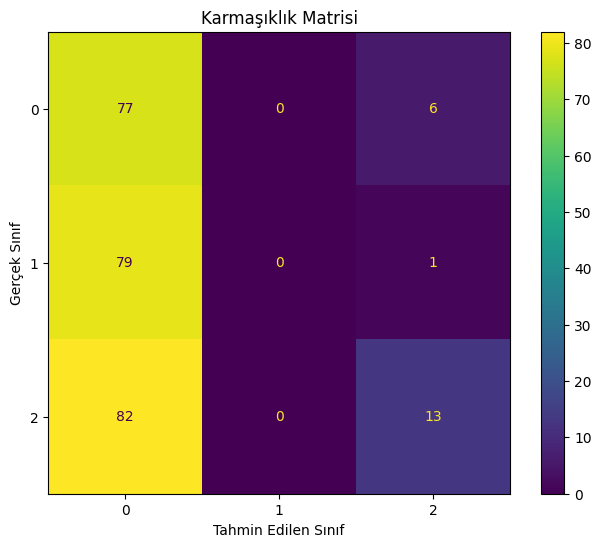

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
# Tahminleri elde etme
y_pred_test = lvq_model.predict(X_test)


# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
class_names = ['0','1','2']
# Karmaşıklık matrisini çizme
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot(ax=ax)
plt.title("Karmaşıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.show()
